# Assignment 2 ME 686A Enengy Storage
---
* ## Prashant Anand Ranjan
* ## 21105066

---
> ### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---
> ### Funtion for calculating mass

In [2]:
def m(string, voltage, lamda=3):                     # Takes String, voltage and lamda as input, returns mass
    if string == 'air_r':                            # For reactant air 
        return 3.57e-7 * (lamda * 10e3 / voltage)
    if string == 'hyd_r':                            # For reactant hydrogen
        return 1.05e-8 * (10e3 / voltage)
    if string == 'air_p':                            # For product air
        return 3.57e-7 * (lamda * 10e3 / voltage) - 8.29e-8 * (10e3 / voltage)
    if string == 'h20_p':                            # For product water
        return 9.34e-8 * (10e3 / voltage)

---
> ### Declaring Variables

In [3]:
n = 6                                                 # Number of divisions                                              
T0 = 298                                              # Ambiant Temperature
T = np.linspace(298, 373, n)                          # Working Temperature range
PP0 = np.array([1, 2, 3])                             # Pressure range

cp_air = 1.005                                        # Sp. heat capacity of Air at constant pressure
k_air = 1.4                                           # Sp. heat capacity ratio of Air
cp_hyd = 14.3                                         # Sp. heat capacity of Hydrogen at constant pressure
k_hyd = 1.4                                           # Sp. heat capacity ratio of Hydrogen
c = (k_air - 1) / k_air

e_ph_air_r = []
e_ph_h2_r = []
e_ph_air_p = [[320.8092486, 321.0982659, 321.9653179, 324.132948, 326.4450867, 329.1907514],
              [381.7919075, 382.5144509, 383.2369942, 385.2601156, 387.5722543, 390.1734104],
             [417.6300578, 417.9190751, 419.0751445, 420.9537572, 422.9768786, 426.300578]]
e_ph_h2o_p = [[0, 115.1102204, 222.2044088,318.0761523,405.9318637,485.7715431],
              [80.16032064,195.2705411,299.1583166,396.6332665,484.488978,567.5350701],
              [158.7174349,275.4308617,379.3186373,475.1903808,564.6492986,644.488978]]

---

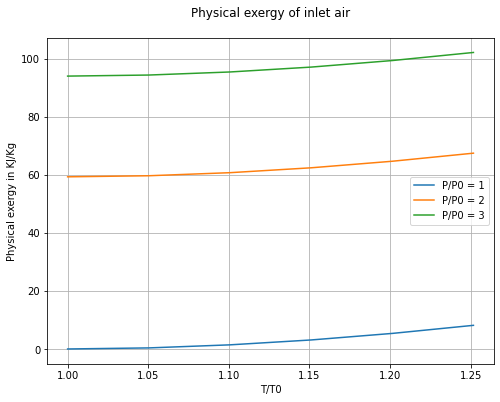

In [4]:
plt.figure(figsize=(8, 6))
plt.grid()
plt.xlabel('T/T0')
plt.ylabel('Physical exergy in KJ/Kg')
plt.title('Physical exergy of inlet air\n')
for P_P0 in PP0:                                     # Finding ePH for reactant air 
    e_ph = cp_air * T0 * ((T / T0) - 1 - np.log(T / T0) + np.log((P_P0)**c))
    e_ph_air_r.append(e_ph)
    plt.plot(T/T0,e_ph, label='P/P0 = {}'.format(P_P0))
    plt.legend()

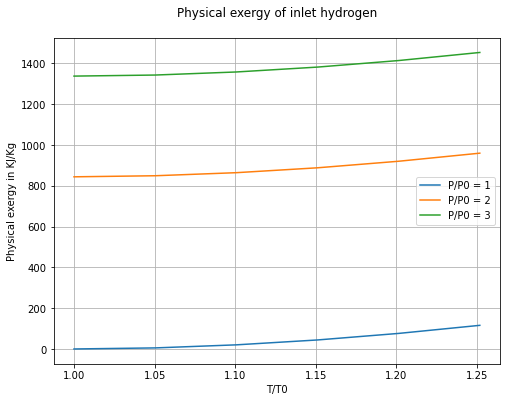

In [5]:
plt.figure(figsize=(8, 6))
plt.grid()
plt.xlabel('T/T0')
plt.ylabel('Physical exergy in KJ/Kg')
plt.title('Physical exergy of inlet hydrogen\n')
for P_P0 in PP0:                                     # Finding ePH for reactant hydrogen
    e_ph = cp_hyd * T0 * ((T / T0) - 1 - np.log(T / T0) + np.log((P_P0)**c))
    e_ph_h2_r.append(e_ph)
    plt.plot(T/T0,e_ph, label='P/P0 = {}'.format(P_P0))
    plt.legend()

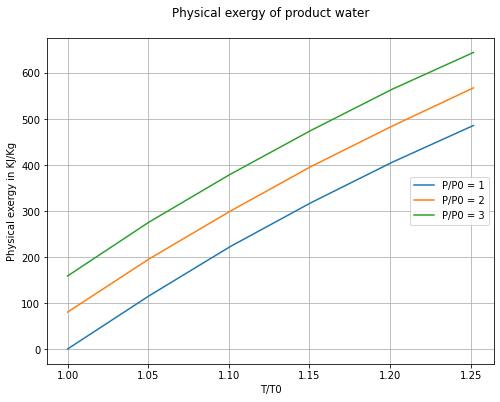

In [6]:
plt.figure(figsize=(8, 6))
plt.grid()
plt.xlabel('T/T0')
plt.ylabel('Physical exergy in KJ/Kg')
plt.title('Physical exergy of product water\n')
for i in range(3):                                     # Finding ePH for product water
    plt.plot(T/T0,e_ph_h2o_p[i], label = 'P/P0 = {}'.format(i+1))
    plt.legend(loc='center right')

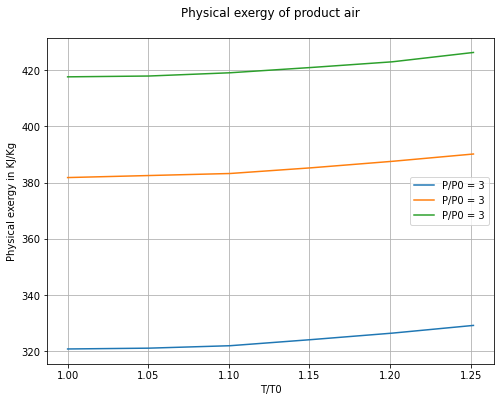

In [7]:
plt.figure(figsize=(8, 6))
plt.grid()
plt.xlabel('T/T0')
plt.ylabel('Physical exergy in KJ/Kg')
plt.title('Physical exergy of product air\n')
for i in range(3):                                     # Finding ePH for product air
    plt.plot(T/T0,e_ph_air_p[i], label='P/P0 = {}'.format(P_P0))
    plt.legend()

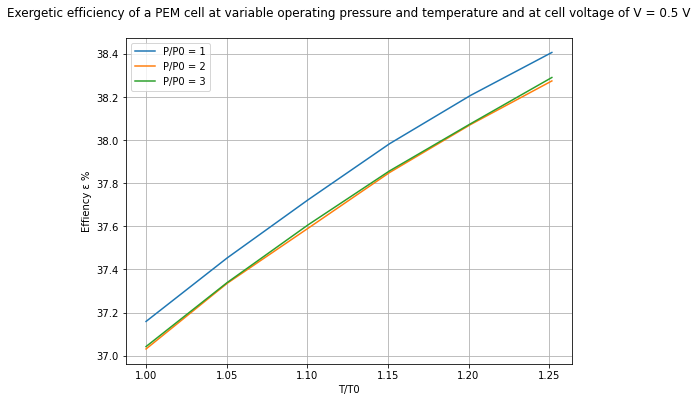

In [8]:
plt.figure(figsize=(8, 6))
plt.grid()
plt.xlabel('T/T0')
plt.ylabel('Effiency ε %')
plt.title('Exergetic efficiency of a PEM cell at variable operating pressure and temperature and at cell voltage of V = 0.5 V\n')
for i in range(3):                   # Finding efficiency at variable operating pressure and temperature
    
    ε = 10 / (((m('air_r',.5) * (0*np.ones(6)+e_ph_air_r[i]) +  m('hyd_r',0.5) *  (159138*np.ones(6)+e_ph_h2_r[i])) - (
        m('h20_p', 0.5) * (2.5*np.ones(6)+e_ph_h2o_p[i]) + m('air_p',.5) * (8.25*np.ones(6)+e_ph_air_p[i])))) * 100
    
    plt.plot(T/T0, ε, label='P/P0 = {}'.format(i+1))
    plt.legend()

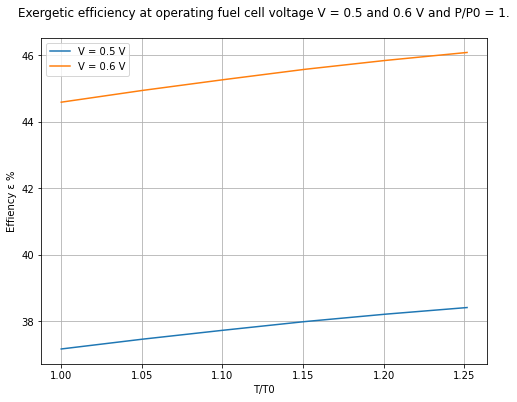

In [9]:
plt.figure(figsize=(8, 6))
plt.grid()
plt.xlabel('T/T0')
plt.ylabel('Effiency ε %')
plt.title('Exergetic efficiency at operating fuel cell voltage V = 0.5 and 0.6 V and P/P0 = 1.\n')
for i in [0.5, 0.6]:                   # Finding efficiency at variable cell voltage
    
    ε = 10 / (((m('air_r',i) * (0*np.ones(6)+e_ph_air_r[0]) +  m('hyd_r',i) *  (159138*np.ones(6)+e_ph_h2_r[0])) - (
        m('h20_p', i) * (2.5*np.ones(6)+e_ph_h2o_p[0]) + m('air_p',i) * (8.25*np.ones(6)+e_ph_air_p[0])))) * 100
    
    plt.plot(T/T0, ε, label='V = {} V'.format(i))
    plt.legend()

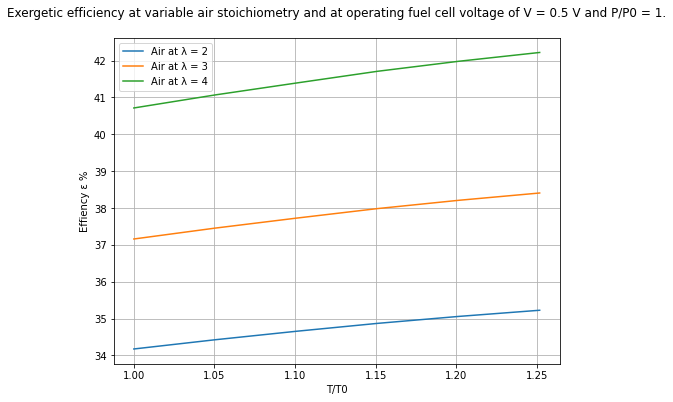

In [10]:
plt.figure(figsize=(8, 6))
plt.grid()
plt.xlabel('T/T0')
plt.ylabel('Effiency ε %')
plt.title('Exergetic efficiency at variable air stoichiometry and at operating fuel cell voltage of V = 0.5 V and P/P0 = 1.\n')
for i in range(3):                   # Finding efficiency at variable stoichiometry
    
    ε = 10 / (((m('air_r',.5, i+2) * (0*np.ones(6)+e_ph_air_r[0]) +  m('hyd_r',0.5,i+2)  *  (159138*np.ones(6)+e_ph_h2_r[0])) - (
        m('h20_p', 0.5,i+2) * (2.5*np.ones(6)+e_ph_h2o_p[0]) + m('air_p',.5,i+2) * (8.25*np.ones(6)+e_ph_air_p[0])))) * 100
    
    plt.plot(T/T0, ε, label='Air at λ = {}'.format(i+2))
    plt.legend()
    